# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

data_path='path'
import sys
sys.path.insert(0, data_path)

#Datasets and system
import numpy as np                # Management of arrays
import os                         # System utils
import pandas as pd
from pathlib import Path          # path and file utils
from scipy.io import loadmat      # Required to load .mat files
import h5py                       #For creating new dataset files
import sklearn
import copy
import matplotlib.pyplot as plt
from sklearn import metrics

!pip install cliffs-delta
from cliffs_delta import cliffs_delta
from scipy.stats import mannwhitneyu


Mounted at /content/drive


In [2]:
def calc_CI(samples, alpha, axis=None):
  import statsmodels.stats.api as sms
  lower_limit=(alpha/2)
  upper_limit=(1-(alpha/2))
  #mean_CI=sms.DescrStatsW(samples).tconfint_mean(alpha=alpha)
  mean=samples.mean()
  low_CI, upper_CI=np.quantile(samples, [lower_limit, upper_limit])

  print(' Mean={}, 95% CI=[ {}, {}]'.format(mean, low_CI, upper_CI))

  return mean, low_CI, upper_CI



# Calculate MDS

In [ ]:
"""
strat_covars=pd.read_csv('***.csv') # biological covariates test set

# BD-I=3, BD-II=4, MDD=2, BD=8

nonHC_data = strat_covars[(strat_covars['Diagnosis']!=0)].reset_index()

BD_data = nonHC_data[nonHC_data['Diagnosis']!=2]

n_feat=170
n_boot=2000
HC_subj_MSE=pd.DataFrame()
BD_subj_MSE=pd.DataFrame()

HC_feat_MSE=pd.DataFrame()
BD_feat_MSE=pd.DataFrame()


boot_delta=pd.DataFrame(np.zeros((n_boot, n_feat)))
boot_mwu=pd.DataFrame(np.zeros((n_boot, n_feat)))

for i in range(0,n_boot):
  print(i)
  boot_id=str(i)
  HC_boot_name='HC_strat_dev_map_boot_' + boot_id + '_.csv'
  BD_boot_name='BD_strat_dev_map_boot_' + boot_id + '_.csv'
  HC_boot_sample_x=pd.read_csv(os.path.join(data_path, HC_boot_name))
  HC_boot_sample_x=HC_boot_sample_x.drop(HC_boot_sample_x.columns[0], axis=1)
  BD_boot_sample_x=pd.read_csv(os.path.join(data_path, BD_boot_name))
  BD_boot_sample_x=BD_boot_sample_x.drop(BD_boot_sample_x.columns[0], axis=1)

  BD_boot_sample_x=BD_boot_sample_x.iloc[BD_data.index,:]

  delta=list()
  mwu=list()
  # Calculate Cliffs Delta for each feature
  for f in range(n_feat):
    d, res = cliffs_delta(HC_boot_sample_x.iloc[:,f], BD_boot_sample_x.iloc[:,f])
    boot_delta.iloc[i,f]=d
    s, pvalue=mannwhitneyu(BD_boot_sample_x.iloc[:,f], HC_boot_sample_x.iloc[:,f], alternative="greater")
    boot_mwu.iloc[i,f]=pvalue


  # DataFrame will have n_subj rows x 1000 bootstrap trials columns
  # To do the mean of the MSE from all bootstraps: mean_MSE + CI per subject
  HC_subj_MSE=pd.concat([HC_subj_MSE,HC_boot_sample_x.mean(axis=1)],axis=1, ignore_index=True)
  HC_feat_MSE=pd.concat([HC_feat_MSE,HC_boot_sample_x.mean(axis=0)],axis=1, ignore_index=True)

  BD_subj_MSE=pd.concat([BD_subj_MSE,BD_boot_sample_x.mean(axis=1)],axis=1, ignore_index=True)
  BD_feat_MSE=pd.concat([BD_feat_MSE,BD_boot_sample_x.mean(axis=0)],axis=1, ignore_index=True)

# Average by the columns to get the mean MSE for each subject
MMSE_HC_subj=HC_subj_MSE.mean(axis=1)
MMSE_BD_subj=BD_subj_MSE.mean(axis=1)


# Average by the rows to get the mean_MSE of all HC for each bootstrap sample
# The HC deviation means for 1000 bootstrap trials follows a normal distribution
MMSE_HC_boot=HC_subj_MSE.mean(axis=0)
MMSE_BD_boot=BD_subj_MSE.mean(axis=0)
"""

# Calculate MEV

trimmed mean top 1% features

In [ ]:
"""
HC_mean_EV=[]
BD_mean_EV=[]

n_feat=170
n_boot=1000

for i in range(0,n_boot):
  print(i)
  boot_id=str(i)
  HC_boot_name='HC_strat_dev_map_boot_' + boot_id + '_.csv'
  BD_boot_name='BD_strat_dev_map_boot_' + boot_id + '_.csv'
  HC_boot_sample_x=pd.read_csv(os.path.join(data_path, HC_boot_name))
  HC_boot_sample_x=HC_boot_sample_x.drop(HC_boot_sample_x.columns[0], axis=1)
  BD_boot_sample_x=pd.read_csv(os.path.join(data_path, BD_boot_name))
  BD_boot_sample_x=BD_boot_sample_x.drop(BD_boot_sample_x.columns[0], axis=1)

  BD_boot_sample_x=BD_boot_sample_x.iloc[BD_data.index,:]

  thr=np.percentile(HC_boot_sample_x, 99, axis=1)
  mask= HC_boot_sample_x > thr.reshape(-1,1)
  HC_mean_EV.append(np.nanmean(HC_boot_sample_x[mask], axis=1))

  thr=np.percentile(BD_boot_sample_x, 99, axis=1)
  mask= BD_boot_sample_x > thr.reshape(-1,1)
  BD_mean_EV.append(np.nanmean(BD_boot_sample_x[mask], axis=1))
  """

In [ ]:
"""
HC_mean_EV_boot_path=  'HC_subj_mean_EV_boot' + '_.csv'
path_save_results=os.path.join(data_path, HC_mean_EV_boot_path)

with open(path_save_results, 'w', encoding = 'utf-8-sig') as f:
  pd.DataFrame(HC_mean_EV).to_csv(f)

BD_mean_EV_boot_path=  'BD_subj_mean_EV_boot_withoutMDD' + '_.csv'
path_save_results=os.path.join(data_path, BD_mean_EV_boot_path)

with open(path_save_results, 'w', encoding = 'utf-8-sig') as f:
 pd.DataFrame(BD_mean_EV).to_csv(f)
 """

# Load bootstrap results to analyse

In [3]:
atlas_ROI_names=pd.read_csv(os.path.join('***', "atlas_ROI_sorted.csv"))


HC_subj_MSE=pd.read_csv(os.path.join(data_path,'HC_all_meansubj_dev_boot_' + '_.csv' ))
HC_subj_MSE=HC_subj_MSE.drop(HC_subj_MSE.columns[0], axis=1)


BD_subj_MSE=pd.read_csv(os.path.join(data_path,'BD_withoutMDD_meansubj_dev_boot_' + '_.csv' ))
BD_subj_MSE=BD_subj_MSE.drop(BD_subj_MSE.columns[0], axis=1)

HC_feat_MSE=pd.read_csv(os.path.join(data_path,'HC_all_meanfeat_dev_boot_' + '_.csv' ))
HC_feat_MSE=HC_feat_MSE.drop(HC_feat_MSE.columns[0], axis=1)


BD_feat_MSE=pd.read_csv(os.path.join(data_path,'BD_withoutMDD_meanfeat_dev_boot_' + '_.csv' ))
BD_feat_MSE=BD_feat_MSE.drop(BD_feat_MSE.columns[0], axis=1)

boot_delta=pd.read_csv(os.path.join(data_path,'deltas_boot_withoutMDD' + '_.csv' ))
boot_delta=boot_delta.drop(boot_delta.columns[0], axis=1)

boot_mwu=pd.read_csv(os.path.join(data_path,'mwu_pvalue_boot_withoutMDD' + '_.csv' ))
boot_mwu=boot_mwu.drop(boot_mwu.columns[0], axis=1)

n_HC=HC_subj_MSE.shape[0]
n_BD=BD_subj_MSE.shape[0]
n_feat=BD_feat_MSE.shape[0]
n_boot=1000

# Average by the columns to get the mean MSE for each subject
MMSE_HC_subj=HC_subj_MSE.mean(axis=1)
MMSE_BD_subj=BD_subj_MSE.mean(axis=1)


# Average by the rows to get the mean_MSE of all HC for each bootstrap sample
# The HC deviation means for 1000 bootstrap trials follows a normal distribution
MMSE_HC_boot=HC_subj_MSE.mean(axis=0)
MMSE_BD_boot=BD_subj_MSE.mean(axis=0)


# Estimate 95% CI for AE model loss

In [ ]:
# Load Loss Plot Figure
import pickle
with open('***/bootstrap_models/boot_losses', "rb") as fp:
  plot_loss = pickle.load(fp)

In [ ]:
mse_train=[]
mean_evol_train=pd.DataFrame()

mean_evol_val=pd.DataFrame()
mse_val=[]
for boot, (loss_train, loss_val) in enumerate(plot_loss):

  mse_train.append(loss_train[-1])
  mse_val.append(loss_val[-1])
  mean_evol_train=pd.concat([mean_evol_train, pd.DataFrame(loss_train)], axis=1)
  mean_evol_val=pd.concat([mean_evol_val, pd.DataFrame(loss_val)], axis=1)

In [ ]:
alpha=0.05
mse_train_stats=calc_CI(np.array(mse_train),alpha)

 Mean=0.182356664031744, 95% CI=[ 0.17954719699919225, 0.1850949965417385]


In [ ]:
alpha=0.05
mse_val_stats=calc_CI(np.array(mse_val),alpha)

 Mean=0.22178209660947323, 95% CI=[ 0.21084316708147527, 0.2328181765973568]


In [ ]:
np.array(mse_val_stats)

array([0.2217821 , 0.21084317, 0.23281818])

In [ ]:
mean_CI_train_evol=[]
mean_CI_val_evol=[]
n_epochs=2000
for i in range(0,n_epochs):
  evol_train_stats=calc_CI(mean_evol_train.iloc[i,:],alpha)
  mean_CI_train_evol.append(np.array(evol_train_stats))

  evol_val_stats=calc_CI(mean_evol_val.iloc[i,:],alpha)
  mean_CI_val_evol.append(np.array(evol_val_stats))

 Mean=1.7536717596054077, 95% CI=[ 1.7241594702005387, 1.7801851332187653]
 Mean=1.682004856467247, 95% CI=[ 1.599020928144455, 1.76662834584713]
 Mean=1.6252587865591048, 95% CI=[ 1.5980762779712676, 1.649096518754959]
 Mean=1.5757860444784164, 95% CI=[ 1.5009906977415084, 1.6540361791849136]
 Mean=1.5266334714889527, 95% CI=[ 1.501576581597328, 1.5487719923257828]
 Mean=1.4909900449514388, 95% CI=[ 1.4213866472244263, 1.562935695052147]
 Mean=1.4461390784978867, 95% CI=[ 1.422665348649025, 1.4670403242111205]
 Mean=1.4199405623674393, 95% CI=[ 1.3544719696044922, 1.4864382177591324]
 Mean=1.377609947681427, 95% CI=[ 1.3556912750005723, 1.3976220339536667]
 Mean=1.3582830950021745, 95% CI=[ 1.295940887928009, 1.4213792711496354]
 Mean=1.3175210849046708, 95% CI=[ 1.29712153673172, 1.3366350948810577]
 Mean=1.3035655187368393, 95% CI=[ 1.2431276232004165, 1.3639287710189818]
 Mean=1.2639885221719742, 95% CI=[ 1.244648054242134, 1.2822488635778426]
 Mean=1.2544107193946838, 95% CI=[ 1.1

In [ ]:
#mean_evol_train.index.name = "epochs"
#mean_evol_train.columns.name = "bootstrap"
#mean_evol_train.name = "loss"
#mean_evol_train

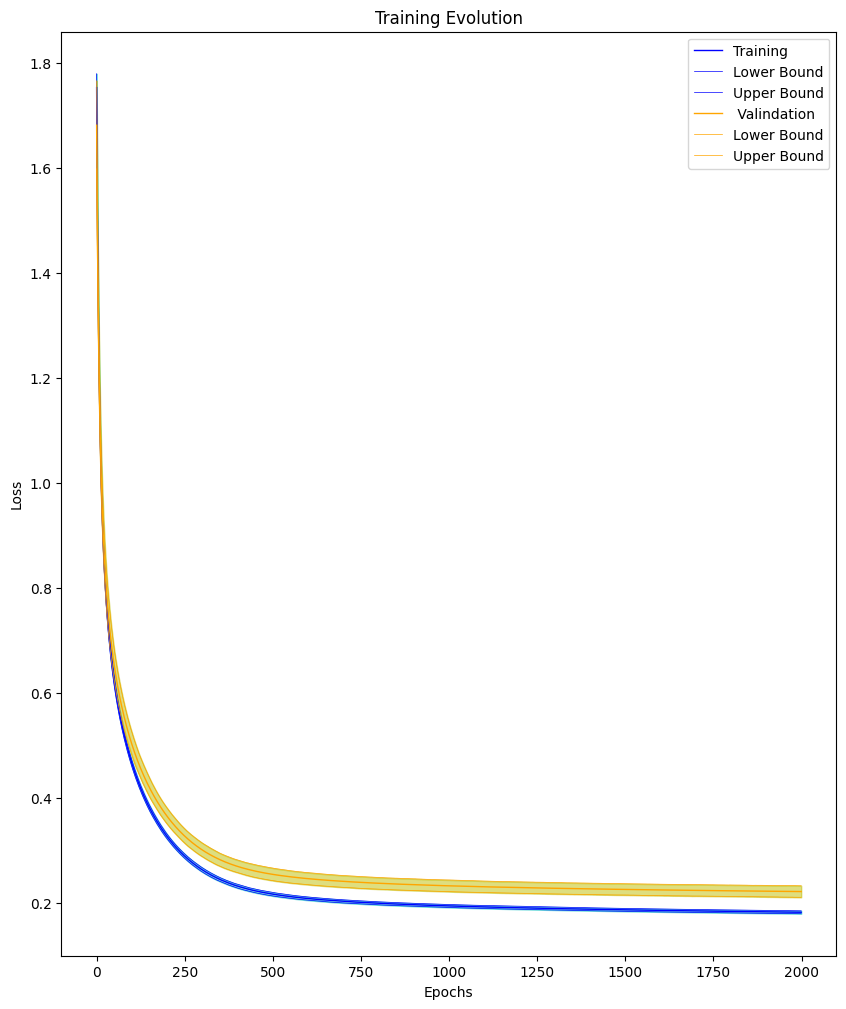

In [ ]:
import seaborn as sns
# Plot the mean line
#sns.lineplot(x=x, y=mean_values, label='Mean')
# Plotting using Seaborn
plt.figure(figsize=(10,12))

mean=pd.DataFrame(mean_CI_train_evol).iloc[:,0]
lower=pd.DataFrame(mean_CI_train_evol).iloc[:,1]
upper=pd.DataFrame(mean_CI_train_evol).iloc[:,2]

plt.plot(np.arange(0,2000), mean, label='Training', color='blue', linewidth=1)

plt.plot(np.arange(0,2000), lower, label="Lower Bound", color='blue', linewidth=0.5,linestyle='-' )

plt.plot(np.arange(0,2000), upper, label="Upper Bound", color='blue', linewidth=0.5, linestyle='-')

# Fill between the confidence intervals
plt.fill_between(np.arange(0,2000), lower, upper, alpha=0.5, color='c')

mean=pd.DataFrame(mean_CI_val_evol).iloc[:,0]
lower=pd.DataFrame(mean_CI_val_evol).iloc[:,1]
upper=pd.DataFrame(mean_CI_val_evol).iloc[:,2]
plt.plot(np.arange(0,2000), mean, label=' Valindation', color='orange', linewidth=1)

plt.plot(np.arange(0,2000), lower, label="Lower Bound", color='orange', linewidth=0.5,linestyle='-' )

plt.plot(np.arange(0,2000), upper, label="Upper Bound", color='orange', linewidth=0.5, linestyle='-')

# Fill between the confidence intervals
plt.fill_between(np.arange(0,2000), lower, upper, alpha=0.5, color='y')

plt.title('Training Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()

# Estimate the 95% CI for HC and BD MDS








In [ ]:
# n_subj x n_bootstrap : the MDS score for each subject in every bootstrap iteration
HC_subj_MSE

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.201161,0.175807,0.175331,0.176816,0.210142,0.178867,0.192147,0.174843,0.199851,0.189779,...,0.194430,0.202881,0.173027,0.199057,0.182054,0.177754,0.201692,0.217141,0.195204,0.212893
1,0.198525,0.170965,0.206862,0.193908,0.187030,0.184244,0.173331,0.186006,0.166906,0.196018,...,0.203984,0.175115,0.160723,0.199819,0.219111,0.151717,0.234287,0.201126,0.178445,0.157988
2,0.142112,0.134936,0.114649,0.121339,0.137746,0.133530,0.127239,0.112117,0.127895,0.113138,...,0.147383,0.129631,0.138750,0.123461,0.153560,0.137727,0.146994,0.127122,0.125449,0.149769
3,0.177932,0.191943,0.174829,0.152050,0.188648,0.152044,0.165216,0.189344,0.154451,0.163027,...,0.162255,0.158898,0.191691,0.164069,0.177362,0.173478,0.195255,0.165077,0.181642,0.183714
4,0.161265,0.145590,0.143438,0.160674,0.156270,0.141909,0.145960,0.157431,0.144378,0.156926,...,0.159864,0.169915,0.124526,0.143466,0.146038,0.155000,0.148431,0.142252,0.163213,0.160794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0.204937,0.195241,0.200979,0.208062,0.189555,0.205990,0.201039,0.171244,0.189868,0.194851,...,0.185037,0.200965,0.182173,0.199629,0.230313,0.198261,0.212024,0.180249,0.212047,0.182596
359,0.200718,0.194430,0.185980,0.177501,0.171183,0.193415,0.178867,0.202423,0.175018,0.169053,...,0.193845,0.174625,0.197472,0.178844,0.145588,0.194831,0.167973,0.208586,0.180127,0.183337
360,0.195675,0.186292,0.221754,0.233298,0.253570,0.220989,0.219239,0.219656,0.218453,0.230173,...,0.251009,0.220534,0.221709,0.239642,0.213830,0.228431,0.173072,0.231512,0.215618,0.234963
361,0.284603,0.273058,0.326378,0.276717,0.280203,0.290840,0.294644,0.267534,0.275996,0.277725,...,0.297079,0.245178,0.294815,0.296964,0.267442,0.277932,0.269334,0.269375,0.255511,0.262912


In [ ]:
# In each bootstrap iteration there is 1 result for the group-specific MDS
# We can calculate the mean value of MDS for each group by averaging all subjects in that group OR
# We can present the median value of MDS for each group, meaning 50% of subjects were bellow that value
# and the other 50% above that value
HC_subj_MSE.mean(axis=0)

0      0.219711
1      0.218521
2      0.221029
3      0.218068
4      0.221431
         ...   
995    0.222697
996    0.219761
997    0.221545
998    0.220637
999    0.219412
Length: 1000, dtype: float64

<Axes: >

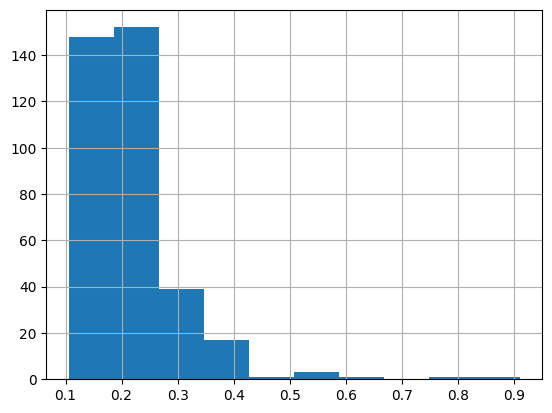

In [ ]:
# The subjects MDS distribution is not normal, so the median is a more proper statistics to
# understand the central tendency of the MDS
HC_subj_MSE.iloc[:,0].hist()

**group-mean MDS 95% CI**

In [ ]:
alpha=0.05
HC_boot_stats=calc_CI(HC_subj_MSE.mean(axis=0),alpha)
BD_boot_stats=calc_CI(BD_subj_MSE.mean(axis=0),alpha)


 Mean=0.21949362683402876, 95% CI=[ 0.2164588069758568, 0.22267453630539286]
 Mean=0.25713573908299525, 95% CI=[ 0.25258136880551574, 0.26185591609875314]


**group-mean MDS are statistical significant different?**

In [ ]:
alpha=0.05
differences_boot_stats=calc_CI(MMSE_HC_boot-MMSE_BD_boot,alpha)
# Does not include zero -> significant difference

 Mean=-0.0376421122489665, 95% CI=[ -0.04147335988537815, -0.0338692474107931]


**group-median MDS 95% CI**

In [ ]:
alpha=0.05
HC_boot_stats=calc_CI(HC_subj_MSE.median(axis=0),alpha)
BD_boot_stats=calc_CI(BD_subj_MSE.median(axis=0),alpha)


 Mean=0.19881634407659562, 95% CI=[ 0.19451370881191435, 0.203003635359914]
 Mean=0.2264177483875746, 95% CI=[ 0.22095408855248266, 0.23243562243699234]


In [ ]:
medianMSE_HC_boot=HC_subj_MSE.median(axis=0)
medianMSE_BD_boot=BD_subj_MSE.median(axis=0)
differences_boot_stats=calc_CI(medianMSE_HC_boot-medianMSE_BD_boot,alpha)
# Does not include zero -> significant difference

 Mean=-0.02760140431097903, 95% CI=[ -0.033904231726418745, -0.021551368176369046]


# Estimate 95% CI for each feature MDS

In [ ]:
# For each feature a MDS score was calculated based on all subjects of each group
# (n_feat, n_bootstrap)
HC_feat_MSE 

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.194195,0.221210,0.246581,0.192867,0.225213,0.196831,0.203439,0.148542,0.207074,0.275949,...,0.232283,0.226698,0.232541,0.220123,0.281176,0.244224,0.186843,0.184522,0.199764,0.213122
1,0.307129,0.316845,0.318369,0.244995,0.298607,0.272492,0.291653,0.272680,0.257688,0.292854,...,0.313699,0.254090,0.311506,0.234986,0.299810,0.247495,0.272117,0.275038,0.272232,0.277532
2,0.148131,0.177269,0.175338,0.149416,0.131357,0.147146,0.212646,0.163194,0.178079,0.208681,...,0.155252,0.140549,0.153573,0.203737,0.208612,0.254125,0.169808,0.204616,0.110726,0.245030
3,0.120002,0.255029,0.165860,0.205084,0.206327,0.149763,0.206167,0.161139,0.183072,0.140870,...,0.201229,0.168228,0.177787,0.169398,0.194821,0.191614,0.208653,0.170328,0.168497,0.163445
4,0.208667,0.193762,0.191469,0.210148,0.180761,0.189488,0.196003,0.193189,0.199688,0.209814,...,0.190424,0.202956,0.198692,0.188689,0.204346,0.188488,0.196305,0.176721,0.186163,0.190122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.393418,0.315792,0.334643,0.310922,0.419527,0.341705,0.304325,0.278015,0.406886,0.343490,...,0.412113,0.335146,0.306457,0.284940,0.305531,0.282405,0.345171,0.396277,0.381857,0.398986
166,0.321407,0.308829,0.335674,0.349836,0.275034,0.409644,0.280456,0.379249,0.301985,0.263419,...,0.310242,0.202111,0.285785,0.311222,0.303841,0.269648,0.347931,0.309511,0.279157,0.377684
167,0.138597,0.196866,0.186635,0.148889,0.149508,0.169045,0.144185,0.178797,0.133107,0.140194,...,0.153874,0.187624,0.152291,0.151456,0.173028,0.169464,0.152514,0.202034,0.160541,0.169707
168,0.203179,0.218375,0.201631,0.250200,0.233239,0.226175,0.219869,0.189231,0.222020,0.222382,...,0.232578,0.224058,0.221823,0.241861,0.228125,0.205776,0.206361,0.230390,0.232595,0.241013


Calculate the bootstrap 95% CI

In [ ]:
alpha=0.05
n_feat=HC_feat_MSE.shape[0]
HC_boot_stats=calc_CI(HC_feat_MSE.iloc[0,:],alpha)
BD_boot_stats=calc_CI(BD_feat_MSE.iloc[0,:],alpha)
HC_mean_CI_feat=pd.DataFrame(HC_boot_stats)
BD_mean_CI_feat=pd.DataFrame(BD_boot_stats)

for i in range(1,n_feat):
  HC_boot_stats=calc_CI(HC_feat_MSE.iloc[i,:],alpha)
  BD_boot_stats=calc_CI(BD_feat_MSE.iloc[i,:],alpha)

  HC_mean_CI_feat=pd.concat([HC_mean_CI_feat, pd.DataFrame(HC_boot_stats)], axis=1)
  BD_mean_CI_feat=pd.concat([BD_mean_CI_feat, pd.DataFrame(BD_boot_stats)], axis=1)

HC_mean_CI_feat.index=['mean', 'lower_bound', 'upper_bound']
BD_mean_CI_feat.index=['mean', 'lower_bound', 'upper_bound']
HC_mean_CI_feat.columns=np.arange(0,170)
BD_mean_CI_feat.columns=np.arange(0,170)

 Mean=0.20589280373339608, 95% CI=[ 0.15587432913442306, 0.27183330459278415]
 Mean=0.2868509634954868, 95% CI=[ 0.21715328955088747, 0.3732731915861843]
 Mean=0.28010836361490066, 95% CI=[ 0.21116108282484822, 0.3488586399924591]
 Mean=0.2723220875389127, 95% CI=[ 0.2036117735906744, 0.3414415899352581]
 Mean=0.17561115014514705, 95% CI=[ 0.11574955866489821, 0.24861748182197027]
 Mean=0.2082226460819939, 95% CI=[ 0.13571157001538992, 0.3003281909593908]
 Mean=0.18076940685604212, 95% CI=[ 0.13243768889736474, 0.23921962165819283]
 Mean=0.19817041704205374, 95% CI=[ 0.1469279055414124, 0.2657980896520066]
 Mean=0.19225705941731205, 95% CI=[ 0.172077388524968, 0.2146977542356657]
 Mean=0.2038665653622019, 95% CI=[ 0.17659177712781987, 0.23546733714921395]
 Mean=0.19839614845996312, 95% CI=[ 0.17602405182774966, 0.22454940005933174]
 Mean=0.2421496856986471, 95% CI=[ 0.20851531659672987, 0.27817220271857107]
 Mean=0.3143855158357949, 95% CI=[ 0.26703436784210616, 0.3590246715945813]
 Me

<ipython-input-24-fa59b87b79c1>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-_" (-> color='r'). The keyword argument will take precedence.
  plt.plot((y_group1[0:68],y_group1[0:68]), (HC_CI[0,0:68],HC_CI[1,0:68]),'r-_', color='darkorange')
<ipython-input-24-fa59b87b79c1>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_group1[0:68],HC_means[0:68],'r.',color='darkorange')
<ipython-input-24-fa59b87b79c1>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-_" (-> color='r'). The keyword argument will take precedence.
  plt.plot((y_group2[0:68],y_group2[0:68]), (BD_CI[0,0:68],BD_CI[1,0:68]),'r-_', color='mediumaquamarine')
<ipython-input-24-fa59b87b79c1>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='

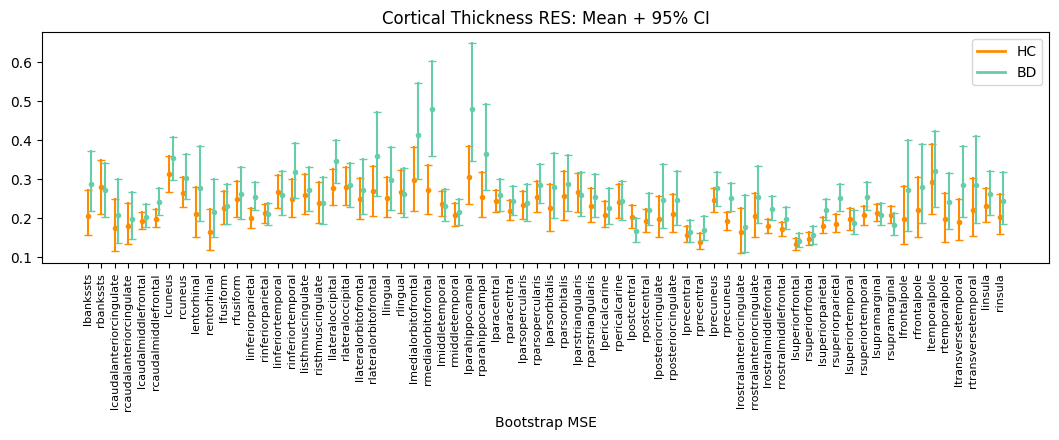

In [ ]:
from matplotlib.lines import Line2D
y = np.arange(68)  # y-coordinates for the features
dk40_names=atlas_ROI_names[atlas_ROI_names['dk40']==1]['Atlases_sorted'].values

plt.figure(figsize=(13,3))

HC_means=HC_mean_CI_feat.loc['mean'].values.copy()
HC_CI=HC_mean_CI_feat.loc[['lower_bound','upper_bound']].values.copy()

BD_means=BD_mean_CI_feat.loc['mean'].values.copy()
BD_CI=BD_mean_CI_feat.loc[['lower_bound','upper_bound']].values.copy()

y_spacing = np.array([15]*68)
y_group1 = y * y_spacing
y_group2 = y_group1 + np.array([4]*68)   # Adjust the spacing for the second group

#fig, ax=plt.subplots(2,1, figsize=(10,5))
plt.plot((y_group1[0:68],y_group1[0:68]), (HC_CI[0,0:68],HC_CI[1,0:68]),'r-_', color='darkorange')
plt.plot(y_group1[0:68],HC_means[0:68],'r.',color='darkorange')
plt.xticks(y_group1[0:68],dk40_names, rotation=90, fontsize=8)

plt.plot((y_group2[0:68],y_group2[0:68]), (BD_CI[0,0:68],BD_CI[1,0:68]),'r-_', color='mediumaquamarine')
plt.plot(y_group2[0:68],BD_means[0:68],'r.',color='mediumaquamarine')

plt.xlabel('Bootstrap MSE')
plt.title('Cortical Thickness RES: Mean + 95% CI')

legend_elements = [
    Line2D([0], [0], color='darkorange', lw=2, label='HC'),
    Line2D([0], [0], color='mediumaquamarine', lw=2, label='BD')
]

# Set legends using the created legend handles
plt.legend(handles=legend_elements, loc='upper right')


plt.show()

<ipython-input-25-fe755452ce53>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-_" (-> color='r'). The keyword argument will take precedence.
  plt.plot((y_group1[0:n],y_group1[0:n]), (HC_CI[0,68:68+n],HC_CI[1,68:68+n]),'r-_',color='darkorange')
<ipython-input-25-fe755452ce53>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_group1[0:n],HC_means[68:68+n],'r.',color='darkorange')
<ipython-input-25-fe755452ce53>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-_" (-> color='r'). The keyword argument will take precedence.
  plt.plot((y_group2[0:n],y_group2[0:n]), (BD_CI[0,68:68+n],BD_CI[1,68:68+n]),'r-_',color='mediumaquamarine')
<ipython-input-25-fe755452ce53>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (->

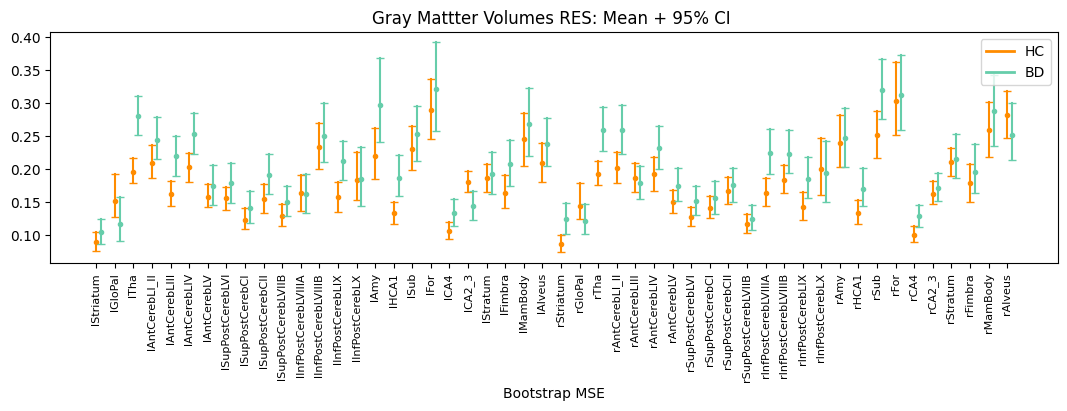

In [ ]:

vgm_cobra_names=atlas_ROI_names[atlas_ROI_names['cobra_vgm']==1]['Atlases_sorted'].values
n=len(vgm_cobra_names)
y = np.arange(n)  # y-coordinates for the features
plt.figure(figsize=(13,3))

HC_means=HC_mean_CI_feat.loc['mean'].values.copy()
HC_CI=HC_mean_CI_feat.loc[['lower_bound','upper_bound']].values.copy()

BD_means=BD_mean_CI_feat.loc['mean'].values.copy()
BD_CI=BD_mean_CI_feat.loc[['lower_bound','upper_bound']].values.copy()

y_spacing = np.array([15]*n)
y_group1 = y * y_spacing
y_group2 = y_group1 + np.array([4]*n)   # Adjust the spacing for the second group

#fig, ax=plt.subplots(2,1, figsize=(10,5))
plt.plot((y_group1[0:n],y_group1[0:n]), (HC_CI[0,68:68+n],HC_CI[1,68:68+n]),'r-_',color='darkorange')
plt.plot(y_group1[0:n],HC_means[68:68+n],'r.',color='darkorange')
plt.xticks(y_group1[0:n],vgm_cobra_names, rotation=90, fontsize=8)

plt.plot((y_group2[0:n],y_group2[0:n]), (BD_CI[0,68:68+n],BD_CI[1,68:68+n]),'r-_',color='mediumaquamarine')
plt.plot(y_group2[0:n],BD_means[68:68+n],'r.',color='mediumaquamarine')

plt.xlabel('Bootstrap MSE')
legend_elements = [
    Line2D([0], [0], color='darkorange', lw=2, label='HC'),
    Line2D([0], [0], color='mediumaquamarine', lw=2, label='BD')
]

# Set legends using the created legend handles
plt.legend(handles=legend_elements, loc='upper right')


plt.title('Gray Mattter Volumes RES: Mean + 95% CI ')


plt.show()

<ipython-input-26-aa39650a1206>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-_" (-> color='r'). The keyword argument will take precedence.
  plt.plot((y_group1[0:n],y_group1[0:n]), (HC_CI[0,:n],HC_CI[1,:n]),'r-_',color='darkorange')
<ipython-input-26-aa39650a1206>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(y_group1[0:n],HC_means[:n],'r.',color='darkorange')
<ipython-input-26-aa39650a1206>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-_" (-> color='r'). The keyword argument will take precedence.
  plt.plot((y_group2[0:n],y_group2[0:n]), (BD_CI[0,:n],BD_CI[1,:n]),'r-_',color='mediumaquamarine')
<ipython-input-26-aa39650a1206>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword 

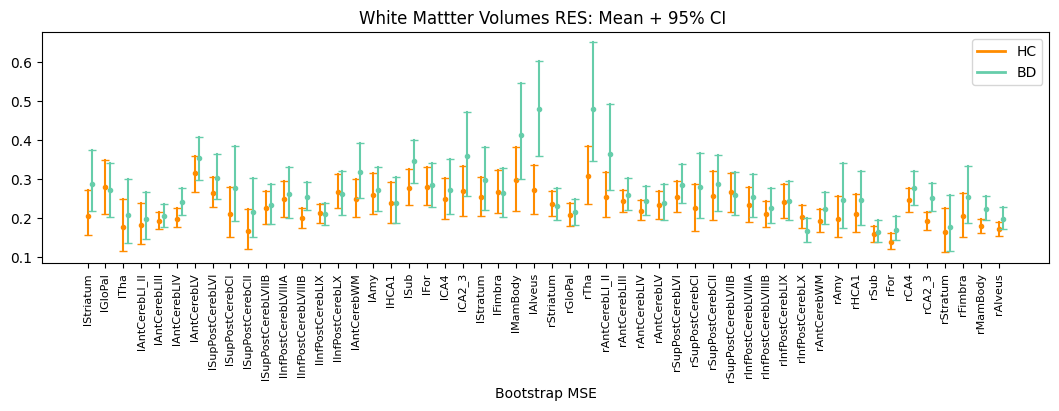

In [ ]:
wgm_cobra_names=atlas_ROI_names[atlas_ROI_names['cobra_vwm']==1]['Atlases_sorted'].values
n=len(wgm_cobra_names)
y = np.arange(n)  # y-coordinates for the features
plt.figure(figsize=(13,3))

HC_means=HC_mean_CI_feat.loc['mean'].values.copy()
HC_CI=HC_mean_CI_feat.loc[['lower_bound','upper_bound']].values.copy()

BD_means=BD_mean_CI_feat.loc['mean'].values.copy()
BD_CI=BD_mean_CI_feat.loc[['lower_bound','upper_bound']].values.copy()

y_spacing = np.array([15]*n)
y_group1 = y * y_spacing
y_group2 = y_group1 + np.array([4]*n)   # Adjust the spacing for the second group

#fig, ax=plt.subplots(2,1, figsize=(10,5))
plt.plot((y_group1[0:n],y_group1[0:n]), (HC_CI[0,:n],HC_CI[1,:n]),'r-_',color='darkorange')
plt.plot(y_group1[0:n],HC_means[:n],'r.',color='darkorange')
plt.xticks(y_group1[0:n],wgm_cobra_names, rotation=90, fontsize=8)

plt.plot((y_group2[0:n],y_group2[0:n]), (BD_CI[0,:n],BD_CI[1,:n]),'r-_',color='mediumaquamarine')
plt.plot(y_group2[0:n],BD_means[:n],'r.',color='mediumaquamarine')

plt.xlabel('Bootstrap MSE')
legend_elements = [
    Line2D([0], [0], color='darkorange', lw=2, label='HC'),
    Line2D([0], [0], color='mediumaquamarine', lw=2, label='BD')
]

# Set legends using the created legend handles
plt.legend(handles=legend_elements, loc='upper right')


plt.title('White Mattter Volumes RES: Mean + 95% CI ')


plt.show()

# Estimate 95% CI for each subject MDS

In [ ]:
# For each row (subjects) calculate the bootstrap 95% CI
HC_subj_MSE

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.201161,0.175807,0.175331,0.176816,0.210142,0.178867,0.192147,0.174843,0.199851,0.189779,...,0.194430,0.202881,0.173027,0.199057,0.182054,0.177754,0.201692,0.217141,0.195204,0.212893
1,0.198525,0.170965,0.206862,0.193908,0.187030,0.184244,0.173331,0.186006,0.166906,0.196018,...,0.203984,0.175115,0.160723,0.199819,0.219111,0.151717,0.234287,0.201126,0.178445,0.157988
2,0.142112,0.134936,0.114649,0.121339,0.137746,0.133530,0.127239,0.112117,0.127895,0.113138,...,0.147383,0.129631,0.138750,0.123461,0.153560,0.137727,0.146994,0.127122,0.125449,0.149769
3,0.177932,0.191943,0.174829,0.152050,0.188648,0.152044,0.165216,0.189344,0.154451,0.163027,...,0.162255,0.158898,0.191691,0.164069,0.177362,0.173478,0.195255,0.165077,0.181642,0.183714
4,0.161265,0.145590,0.143438,0.160674,0.156270,0.141909,0.145960,0.157431,0.144378,0.156926,...,0.159864,0.169915,0.124526,0.143466,0.146038,0.155000,0.148431,0.142252,0.163213,0.160794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0.204937,0.195241,0.200979,0.208062,0.189555,0.205990,0.201039,0.171244,0.189868,0.194851,...,0.185037,0.200965,0.182173,0.199629,0.230313,0.198261,0.212024,0.180249,0.212047,0.182596
359,0.200718,0.194430,0.185980,0.177501,0.171183,0.193415,0.178867,0.202423,0.175018,0.169053,...,0.193845,0.174625,0.197472,0.178844,0.145588,0.194831,0.167973,0.208586,0.180127,0.183337
360,0.195675,0.186292,0.221754,0.233298,0.253570,0.220989,0.219239,0.219656,0.218453,0.230173,...,0.251009,0.220534,0.221709,0.239642,0.213830,0.228431,0.173072,0.231512,0.215618,0.234963
361,0.284603,0.273058,0.326378,0.276717,0.280203,0.290840,0.294644,0.267534,0.275996,0.277725,...,0.297079,0.245178,0.294815,0.296964,0.267442,0.277932,0.269334,0.269375,0.255511,0.262912


In [ ]:
alpha=0.05
n_HC=HC_subj_MSE.shape[0]
n_BD=BD_subj_MSE.shape[0]

HC_boot_stats=calc_CI(HC_subj_MSE.iloc[0,:],alpha)
BD_boot_stats=calc_CI(BD_subj_MSE.iloc[0,:],alpha)

HC_mean_CI_subj=pd.DataFrame(HC_boot_stats)
BD_mean_CI_subj=pd.DataFrame(BD_boot_stats)

for i in range(1,n_HC):
  HC_boot_stats=calc_CI(HC_subj_MSE.iloc[i,:],alpha)
  HC_mean_CI_subj=pd.concat([HC_mean_CI_subj, pd.DataFrame(HC_boot_stats)], axis=1)

for i in range(1, n_BD):
  BD_boot_stats=calc_CI(BD_subj_MSE.iloc[i,:],alpha)
  BD_mean_CI_subj=pd.concat([BD_mean_CI_subj, pd.DataFrame(BD_boot_stats)], axis=1)


HC_mean_CI_subj.index=['mean', 'lower_bound', 'upper_bound']
BD_mean_CI_subj.index=['mean', 'lower_bound', 'upper_bound']
HC_mean_CI_subj.columns=np.arange(0,n_HC)
BD_mean_CI_subj.columns=np.arange(0, n_BD)

 Mean=0.18822041131820458, 95% CI=[ 0.16179891914699887, 0.2147677668319543]
 Mean=0.2007549796534515, 95% CI=[ 0.16838145824246803, 0.2352977780692501]
 Mean=0.18379954175545637, 95% CI=[ 0.1514824155938198, 0.2152065906032263]
 Mean=0.1308455727209463, 95% CI=[ 0.10864282159262043, 0.1549655642761018]
 Mean=0.17485409156647708, 95% CI=[ 0.15205016293597381, 0.19968760013827586]
 Mean=0.150086241981876, 95% CI=[ 0.13086022158800606, 0.17220664648687706]
 Mean=0.3082362567114934, 95% CI=[ 0.2642017872290135, 0.35687608524271913]
 Mean=0.15784177578560776, 95% CI=[ 0.13606798551126303, 0.18481648577904736]
 Mean=0.1165436372309935, 95% CI=[ 0.10054957143913135, 0.13435672416579325]
 Mean=0.14778726155029667, 95% CI=[ 0.12984143192665298, 0.16481147594896953]
 Mean=0.180565941744572, 95% CI=[ 0.1527294112616663, 0.2102632582470861]
 Mean=0.1589481576277196, 95% CI=[ 0.13316505109471038, 0.18719719538101612]
 Mean=0.20971021058261238, 95% CI=[ 0.17647943774052, 0.24336885499550834]
 Mean=

In [ ]:
HC_mean_CI_subj

,0,1,2,3,4,5,6,7,8,9,...,353,354,355,356,357,358,359,360,361,362
mean,0.188220,0.183800,0.130846,0.174854,0.150086,0.308236,0.157842,0.116544,0.147787,0.180566,...,0.206595,0.167234,0.185887,0.222661,0.202134,0.194899,0.179102,0.218228,0.278984,0.289607
lower_bound,0.161799,0.151482,0.108643,0.152050,0.130860,0.264202,0.136068,0.100550,0.129841,0.152729,...,0.180262,0.144458,0.158341,0.193138,0.171989,0.158063,0.153116,0.186622,0.240741,0.253296
upper_bound,0.214768,0.215207,0.154966,0.199688,0.172207,0.356876,0.184816,0.134357,0.164811,0.210263,...,0.235915,0.188973,0.215741,0.252081,0.235922,0.232727,0.203707,0.253910,0.314942,0.327459


In [ ]:
BD_mean_CI_subj

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
mean,0.200755,0.246095,0.206208,0.882786,0.223695,0.215519,0.267739,0.299107,0.213496,0.254508,...,0.167451,1.097549,0.240079,0.218990,0.378335,0.257201,0.171605,0.198139,0.184317,0.217679
lower_bound,0.168381,0.210271,0.176406,0.737498,0.184362,0.185375,0.229992,0.260365,0.188385,0.212000,...,0.140266,0.897881,0.207189,0.184800,0.318685,0.223142,0.148063,0.164405,0.163498,0.194209
upper_bound,0.235298,0.279912,0.238119,1.033993,0.268909,0.247772,0.309347,0.342630,0.241270,0.301988,...,0.197378,1.313207,0.273592,0.256739,0.438791,0.294133,0.195193,0.232120,0.205012,0.243272


<ipython-input-31-d6625d5a3357>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-_" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot((y_group1,y_group1), (HC_CI[0,:],HC_CI[1,:]),'r-_',color='darkorange')
<ipython-input-31-d6625d5a3357>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(y_group1,HC_means[:],'r.',color='darkorange')
<ipython-input-31-d6625d5a3357>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-_" (-> color='r'). The keyword argument will take precedence.
  ax[1].plot((y_group2,y_group2), (BD_CI[0,:],BD_CI[1,:]),'r-_',color='mediumaquamarine')
<ipython-input-31-d6625d5a3357>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take prece

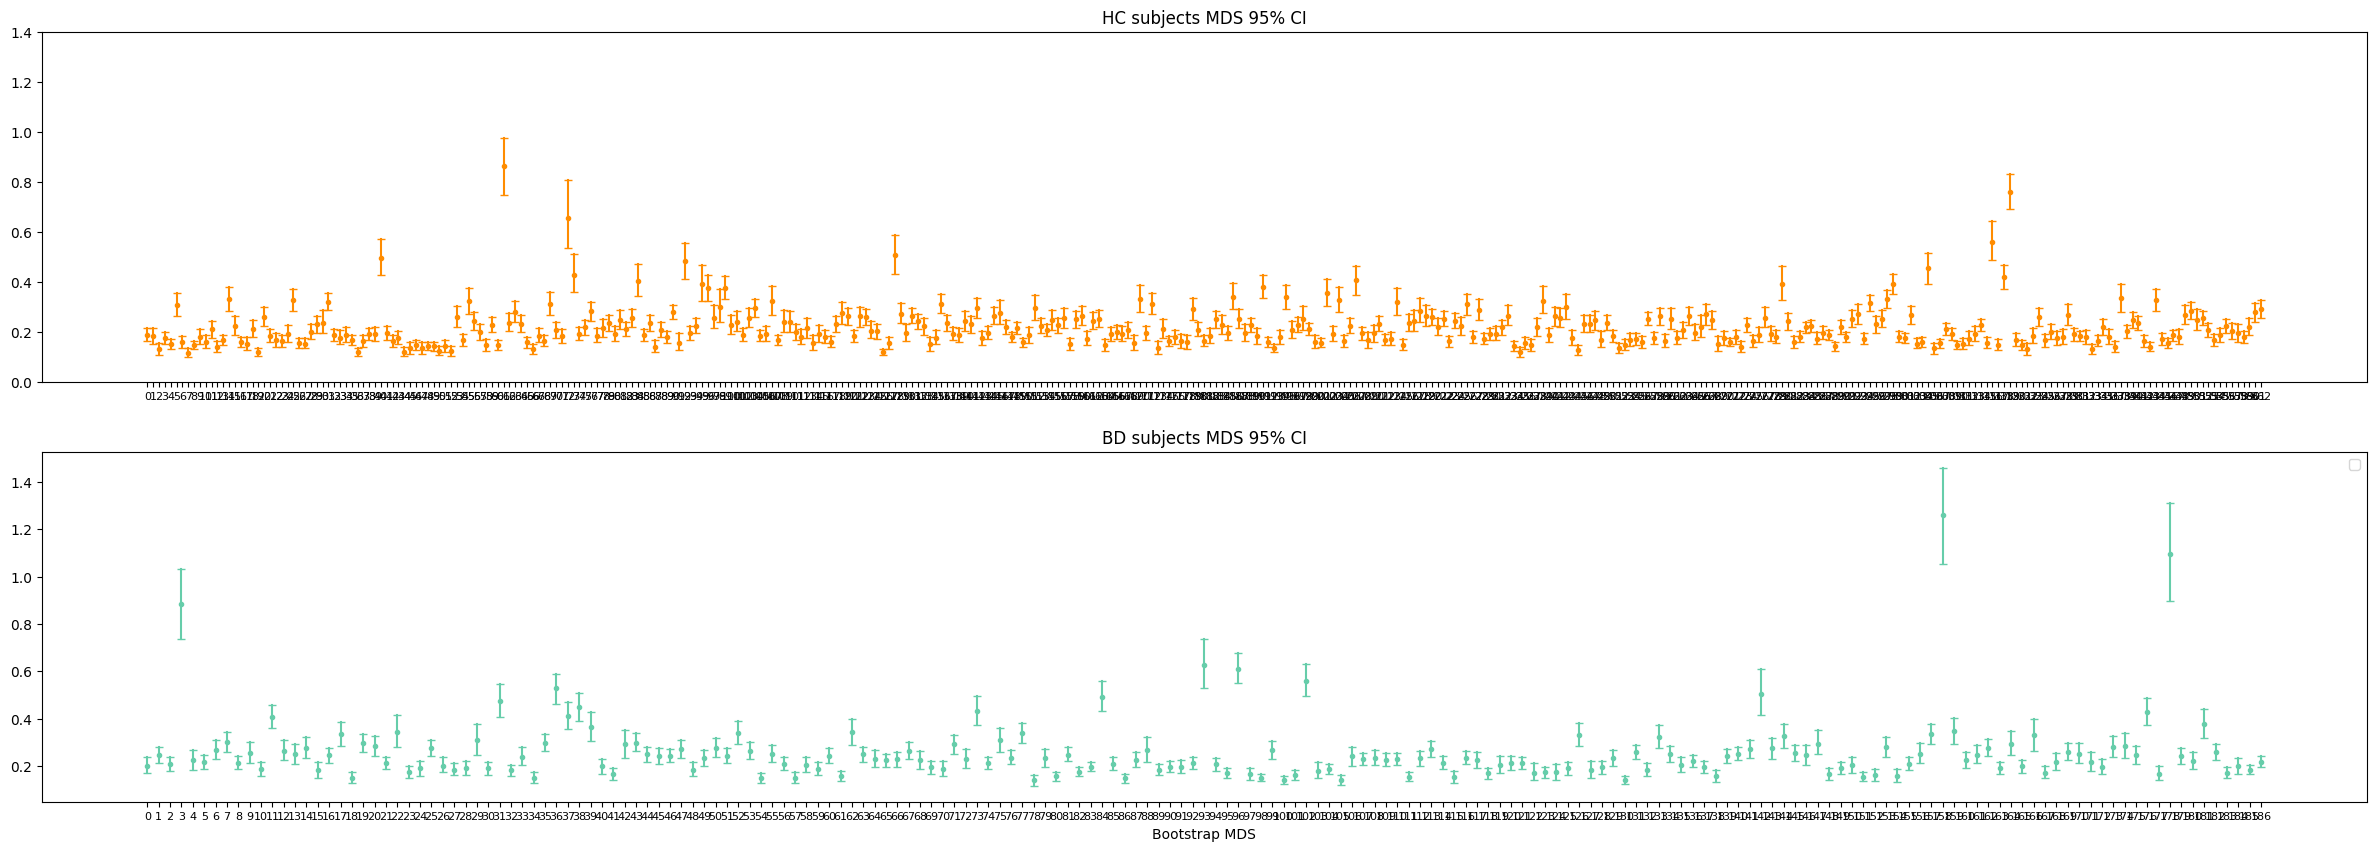

In [ ]:
n_hc_subjs = HC_subj_MSE.shape[0]  # y-coordinates for the features
n_bd_subjs = BD_subj_MSE.shape[0]
HC_means=HC_mean_CI_subj.loc['mean'].values.copy()
HC_CI=HC_mean_CI_subj.loc[['lower_bound','upper_bound']].values.copy()

BD_means=BD_mean_CI_subj.loc['mean'].values.copy()
BD_CI=BD_mean_CI_subj.loc[['lower_bound','upper_bound']].values.copy()

y=np.arange(n_hc_subjs)
y_spacing = np.array([20]*n_hc_subjs)
y_group1 = y * y_spacing

fig, ax=plt.subplots(2,1, figsize=(30,10))
ax[0].plot((y_group1,y_group1), (HC_CI[0,:],HC_CI[1,:]),'r-_',color='darkorange')
ax[0].plot(y_group1,HC_means[:],'r.',color='darkorange')
ax[0].set_xticks(y_group1,y, rotation=0, fontsize=8)
ax[0].set_title('HC subjects MDS 95% CI')
ax[0].set_ylim([0,1.4])

y=np.arange(n_bd_subjs)
y_spacing = np.array([20]*n_bd_subjs)
y_group2 = y * y_spacing

ax[1].plot((y_group2,y_group2), (BD_CI[0,:],BD_CI[1,:]),'r-_',color='mediumaquamarine')
ax[1].plot(y_group2,BD_means[:],'r.',color='mediumaquamarine')
ax[1].set_xticks(y_group2,y, rotation=0, fontsize=8)
ax[1].set_title('BD subjects MDS 95% CI')

plt.xlabel('Bootstrap MDS')
plt.legend()


plt.show()

# Estimate 95% CI  Neuroanatomical Deviating Patterns

**Estimate 95% CI Cliff's delta**

In [4]:
# In each bootstrap iteration: take feature i HC and BD distribution and calculate
# cliffs delta -> repeat until end of bootstrap ite -> calculate the CI of deltas
# for each

alpha=0.05
delta_stats=list()
pvalue_stats=list()
effect_size_feat=list()
pvalue_feat=list()

for f in range(n_feat):

  stats=calc_CI(boot_delta.iloc[:,f], alpha)
  delta_stats.append(stats)
  if np.abs(stats[0])>0.1:
    effect_size_feat.append(f)

  stats=calc_CI(boot_mwu.iloc[:,f], alpha)
  pvalue_stats.append(stats)
  if stats[0]<0.05:
    pvalue_feat.append(f)


 Mean=-0.10224593037816175, 95% CI=[ -0.18775798824413303, -0.01347505192911117]
 Mean=0.06928493471450742, 95% CI=[ 0.00015351076504714248, 0.39790627074996654]
 Mean=0.01893990954759062, 95% CI=[ -0.07518525065924189, 0.10699312031348968]
 Mean=0.609124646001276, 95% CI=[ 0.07421101537273046, 0.9801655713508602]
 Mean=-0.03656333878404853, 95% CI=[ -0.13154048997510348, 0.06233629439754857]
 Mean=0.30210946352470636, 95% CI=[ 0.005726908272921355, 0.8846712422611789]
 Mean=-0.028236855673899892, 95% CI=[ -0.1142477276410188, 0.05578954346577094]
 Mean=0.3423351613533657, 95% CI=[ 0.014042689235062281, 0.8583238132894554]
 Mean=-0.01984826387354339, 95% CI=[ -0.08493098215995636, 0.05111445028800393]
 Mean=0.3756289315620656, 95% CI=[ 0.05128846649523259, 0.8371817681898245]
 Mean=-0.05759446678746627, 95% CI=[ -0.12821187077385418, 0.017135133542522912]
 Mean=0.18282123950910775, 95% CI=[ 0.00685964462284887, 0.629186873923521]
 Mean=-0.02782389770333375, 95% CI=[ -0.1026605382949573

**Find the neuroanatomical deviating patterns with significant cliff's delta whose pvalue 95% CI is also significant ( CI < 0.05)**

In [5]:
# From the features with significant differences between groups
# - the pvalue CI does not include ranges above and bellow 0.05
# select the ones with significant effect size - the CI doesn't include
# zero and is above a certain threshold

significant_diff=list()
i=0
for x,y,z in pvalue_stats:
  if (y<0.05 and z<=0.05): # CI includes only significant pvalues
    if x<=0.05:
      significant_diff.append(i)
  i+=1

significant_delta=[(i, delta_stats[i]) for i in significant_diff]
delta_significant_CI=list()

for i, tup in significant_delta:
    if np.sign(tup[1]) == np.sign(tup[2]): # CI doesn't include zero
      if np.abs(tup[0])>0.1:
        delta_significant_CI.append(i)


In [6]:
delta_significant_CI

[]

## Based on significant mean pvalue estimate + significant cliff's delta

**Find the neuroanatomical deviating patterns with significant cliff's delta, for which the bootstrap mean pvalue estimate is < 0.05**

In [6]:
# From the features with significant differences between groups
# - the pvalue CI does not include ranges above and bellow 0.05
# select the ones with significant effect size - the CI doesn't include
# zero and is above a certain threshold

significant_diff=list()
i=0
for x,y,z in pvalue_stats:
  if x<=0.05: # CI includes only pvalues whose mean estimate is <0.05
      significant_diff.append(i)
  i+=1

significant_delta=[(i, delta_stats[i]) for i in significant_diff]
delta_significant_CI=list()

for i, tup in significant_delta:
    if np.sign(tup[1]) == np.sign(tup[2]): # CI doesn't include zero
      #if np.abs(tup[0])>0.1:
      delta_significant_CI.append(i)

In [7]:
delta_significant_CI

[15, 72, 93, 112, 119, 144, 165]

<ipython-input-8-064aca4d0940>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-|" (-> color='r'). The keyword argument will take precedence.
  plt.plot((CI[0,:],CI[1,:]), (y_spacing,y_spacing),'r-|',color='black')
<ipython-input-8-064aca4d0940>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(delta_stats_sign[:,0],y_spacing,'r.',color='black')


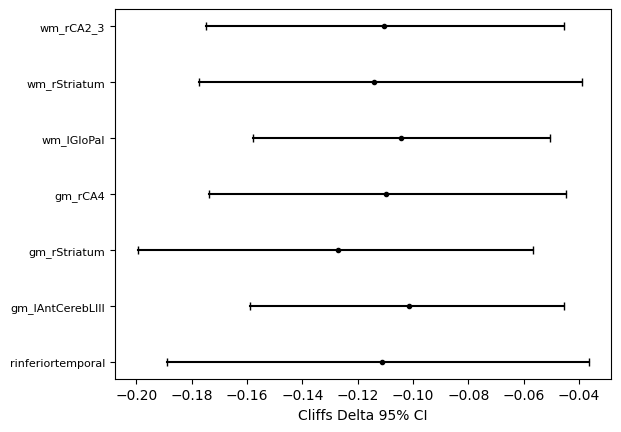

In [8]:
# Plot all the CI intervals for the deltas of significant features
atlas_ROI_names_prefix=copy.deepcopy(atlas_ROI_names)
atlas_ROI_names_prefix.loc[118:169, ('Atlases_sorted')] ='wm_' + atlas_ROI_names.loc[118:169, ('Atlases_sorted')].astype(str)
atlas_ROI_names_prefix.loc[68:117, ('Atlases_sorted')] ='gm_' + atlas_ROI_names.loc[68:117, ('Atlases_sorted')].astype(str)


significant_regions=atlas_ROI_names_prefix.iloc[0:170]['Atlases_sorted'].values[delta_significant_CI]


delta_stats_sign= np.array(delta_stats)[delta_significant_CI]
n_sign_feat=len(delta_significant_CI)
y=np.arange(n_sign_feat)
spacing = np.array([2]*len(delta_significant_CI))
y_spacing = y * spacing


CI=np.zeros((2, n_sign_feat))
CI[0,:]= np.array(delta_stats)[delta_significant_CI][:,1:3][:,0]
CI[1,:]= np.array(delta_stats)[delta_significant_CI][:,1:3][:,1]
CI

#fig, ax=plt.subplots(2,1, figsize=(10,5))
plt.plot((CI[0,:],CI[1,:]), (y_spacing,y_spacing),'r-|',color='black')
plt.plot(delta_stats_sign[:,0],y_spacing,'r.',color='black')
plt.yticks(y_spacing,significant_regions, rotation=0, fontsize=8)

plt.xlabel('Cliffs Delta 95% CI')
#ax[0].set_title('Mean Reconstruction Error 95% CI')


plt.show()

In [60]:
[tup[1]-tup[2] for tup in delta_stats]

[(-0.10224593037816175, -0.18775798824413303, -0.01347505192911117),
 (0.01893990954759062, -0.07518525065924189, 0.10699312031348968),
 (-0.03656333878404853, -0.13154048997510348, 0.06233629439754857),
 (-0.028236855673899892, -0.1142477276410188, 0.05578954346577094),
 (-0.01984826387354339, -0.08493098215995636, 0.05111445028800393),
 (-0.05759446678746627, -0.12821187077385418, 0.017135133542522912),
 (-0.02782389770333375, -0.10266053829495732, 0.043404634581105134),
 (-0.060505973689250266, -0.1320214787643081, 0.014433346591829772),
 (-0.09002572148318377, -0.16212563162004096, -0.011443555634124348),
 (-0.061021611349272954, -0.1410004272182201, 0.018699636127929666),
 (-0.016585230034914026, -0.09866825768624499, 0.0621624607769478),
 (-0.025458876563397688, -0.09651817150601788, 0.053558433140348465),
 (-0.06846457771688687, -0.13799295826519936, 0.00013921421310816718),
 (-0.01629348418556001, -0.09091277382478159, 0.051489371105316616),
 (0.024597221608402917, -0.048936373

###Plot in brain image

In [10]:
!pip install abagen
!pip install nibabel
!pip install nilearn
import abagen
import nibabel as nib

from nilearn import plotting, datasets, surface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 48.4 MB/s eta 0:00:00


In [37]:
atlas = abagen.fetch_desikan_killiany()
dk = nib.load(atlas['image'])

nifti_file = '***/atlases_files/cobra.nii'
cobra = nib.load(nifti_file)

cobra_ids=np.unique(cobra.get_fdata())
cobra_ids=np.delete(cobra_ids,[0]) #[16,41]
cobra_ids_gm=np.delete(cobra_ids,[16,41]) #[16,41]

#23 and 123 are WM



In [38]:
info = pd.read_csv(atlas['info'])
info_copy=info[info['structure']=='cortex'].copy()

gmv_regions=atlas_ROI_names[atlas_ROI_names['cobra_vgm']==1][['Atlases_sorted']]
gmv_regions['id']=cobra_ids_gm

wmv_regions=atlas_ROI_names[atlas_ROI_names['cobra_vwm']==1][['Atlases_sorted']]
wmv_regions['id']=cobra_ids


In [91]:
info = pd.read_csv(atlas['info'])
info_copy=info[info['structure']=='cortex'].copy()

#lh
ct_pairs = list(np.arange(0,68,2))
lh_feat = list(set(delta_significant_CI).intersection(ct_pairs))

info_copy.loc[0:34,('pvalue')]=1

if lh_feat:
  ids=np.where(np.isin(ct_pairs,lh_feat))[0]
  info_copy.loc[0:34, ('pvalue')].iloc[ids]=-np.log10(0.01)


#rh
ct_odds = list(np.arange(1,68,2))

rh_feat = list(set(delta_significant_CI).intersection(list(ct_odds)))

info_copy.loc[34:,('pvalue')]=1

if rh_feat:
  ids=list(np.where(np.isin(ct_odds,rh_feat))[0])
  info_copy.loc[34:, ('pvalue')].iloc[ids]=-np.log10(0.01)



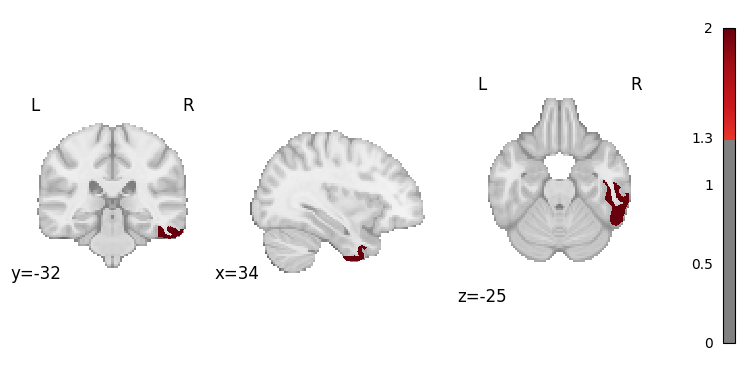

In [146]:
# Extract unique labels from the image data

assigned_values = np.zeros_like(dk.get_fdata())

for roi_id in info_copy.id.values:
  roi_indices=np.where(dk.get_fdata() == roi_id)

  assigned_values[roi_indices] = info_copy[info_copy['id']==roi_id][['pvalue']].values
assigned_CT = nib.Nifti1Image(assigned_values, dk.affine, dk.header)

plotting.plot_stat_map(assigned_CT, cmap='Reds',  display_mode='ortho', cut_coords=(34,-32,-25),
                       threshold= -np.log10(0.05),draw_cross=False)

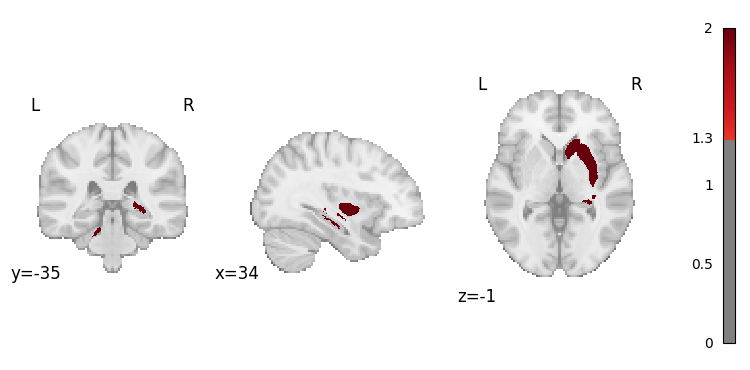

In [149]:
l1=list(set(delta_significant_CI).intersection(list(gmv_regions.index)))
gmv_regions.loc[:, ('pvalue')]= 1
gmv_regions.loc[l1, ('pvalue')]= -np.log10(0.01)

assigned_values = np.zeros_like(cobra.get_fdata())

for roi_id in gmv_regions.id.values:
  roi_indices=np.where(cobra.get_fdata() == roi_id)

  assigned_values[roi_indices] = gmv_regions[gmv_regions['id']==roi_id][['pvalue']].values
assigned_GMV = nib.Nifti1Image(assigned_values, cobra.affine, cobra.header)

plotting.plot_stat_map(assigned_GMV,  cmap='Reds', display_mode='ortho', cut_coords=(34,-35,-1),
                       threshold= -np.log10(0.05),draw_cross=False)

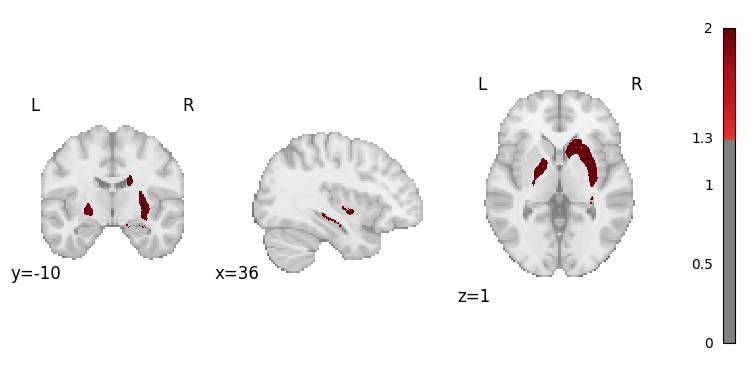

In [139]:

l1=list(set(delta_significant_CI).intersection(list(wmv_regions.index)))
wmv_regions.loc[:, ('pvalue')]= 1
wmv_regions.loc[l1, ('pvalue')]= -np.log10(0.01)

assigned_values = np.zeros_like(cobra.get_fdata())

for roi_id in gmv_regions.id.values:
  roi_indices=np.where(cobra.get_fdata() == roi_id)

  assigned_values[roi_indices] = wmv_regions[wmv_regions['id']==roi_id][['pvalue']].values
assigned_WMV = nib.Nifti1Image(assigned_values, cobra.affine, cobra.header)

plotting.plot_stat_map(assigned_WMV,  cmap='Reds', display_mode='ortho', cut_coords=(36,-10, 1),
                       threshold= -np.log10(0.05),draw_cross=False)

In [ ]:
pd.DataFrame(delta_stats_sign, columns=['Mean delta', '95% CI Lower Bound', '95% CI Upper Bound'], index=significant_regions)

,Mean delta,95% CI Lower Bound,95% CI Upper Bound
rinferiortemporal,-0.111140,-0.188917,-0.036597
gm_lAntCerebLIII,-0.101316,-0.158970,-0.045649
gm_rStriatum,-0.127286,-0.199554,-0.056601
gm_rCA4,-0.109664,-0.173771,-0.044826
wm_lGloPal,-0.104496,-0.157793,-0.050572
wm_rStriatum,-0.113997,-0.177385,-0.039048
wm_rCA2_3,-0.110363,-0.174978,-0.045519


In [ ]:
pd.DataFrame(np.array(pvalue_stats)[delta_significant_CI], columns=['Mean p_value', '95% CI Lower Bound', '95% CI Upper Bound'])

,Mean p_value,95% CI Lower Bound,95% CI Upper Bound
0,0.044898,0.000141,0.240942
1,0.043778,0.001122,0.190163
2,0.022016,0.000063,0.138335
3,0.037147,0.000418,0.194489
4,0.037736,0.001210,0.165540
5,0.036324,0.000325,0.226504
6,0.036657,0.000385,0.190839


## Based exclusively on significant cliff's delta

**Without any selective criteria based on pvalue significance**

In [ ]:
only_delta_significant_CI=[]
for i, tup in enumerate(delta_stats):
    if np.sign(tup[1]) == np.sign(tup[2]): # CI doesn't include zero
      #if np.abs(tup[0])>0.1:
      only_delta_significant_CI.append(i)

In [ ]:
only_delta_significant_CI

[0,
 8,
 15,
 47,
 50,
 70,
 72,
 73,
 77,
 83,
 84,
 87,
 93,
 96,
 98,
 100,
 104,
 109,
 110,
 112,
 119,
 126,
 128,
 131,
 139,
 144,
 145,
 151,
 157,
 165,
 167]

<ipython-input-42-ce5accdc7fea>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-|" (-> color='r'). The keyword argument will take precedence.
  plt.plot((CI[0,:],CI[1,:]), (y_spacing,y_spacing),'r-|',color='black')
<ipython-input-42-ce5accdc7fea>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(delta_stats_sign[:,0],y_spacing,'r.',color='black')


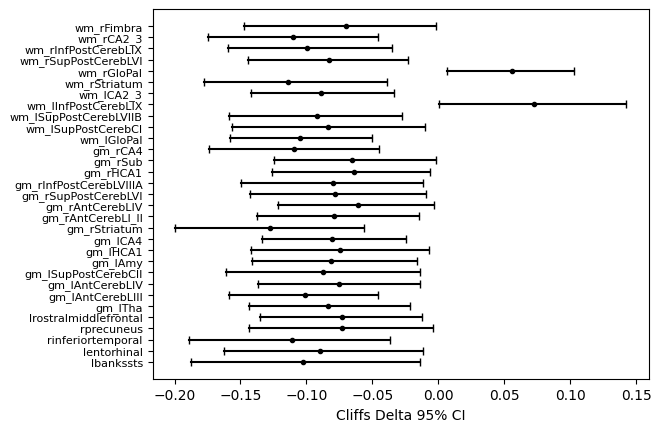

In [ ]:
# Plot all the CI intervals for the deltas of significant features
atlas_ROI_names_prefix=copy.deepcopy(atlas_ROI_names)
atlas_ROI_names_prefix.loc[118:169, ('Atlases_sorted')] ='wm_' + atlas_ROI_names.loc[118:169, ('Atlases_sorted')].astype(str)
atlas_ROI_names_prefix.loc[68:117, ('Atlases_sorted')] ='gm_' + atlas_ROI_names.loc[68:117, ('Atlases_sorted')].astype(str)


significant_regions=atlas_ROI_names_prefix.iloc[0:170]['Atlases_sorted'].values[only_delta_significant_CI]


delta_stats_sign= np.array(delta_stats)[only_delta_significant_CI]
n_sign_feat=len(only_delta_significant_CI)
y=np.arange(n_sign_feat)
spacing = np.array([2]*len(only_delta_significant_CI))
y_spacing = y * spacing


CI=np.zeros((2, n_sign_feat))
CI[0,:]= np.array(delta_stats)[only_delta_significant_CI][:,1:3][:,0]
CI[1,:]= np.array(delta_stats)[only_delta_significant_CI][:,1:3][:,1]
CI

#fig, ax=plt.subplots(2,1, figsize=(10,5))
plt.plot((CI[0,:],CI[1,:]), (y_spacing,y_spacing),'r-|',color='black')
plt.plot(delta_stats_sign[:,0],y_spacing,'r.',color='black')
plt.yticks(y_spacing,significant_regions, rotation=0, fontsize=8)

plt.xlabel('Cliffs Delta 95% CI')
#ax[0].set_title('Mean Reconstruction Error 95% CI')


plt.show()

In [ ]:
pd.DataFrame(delta_stats_sign, columns=['Mean delta', '95% CI Lower Bound', '95% CI Upper Bound'], index=significant_regions)

,Mean delta,95% CI Lower Bound,95% CI Upper Bound
lbankssts,-0.102246,-0.187758,-0.013475
lentorhinal,-0.090026,-0.162126,-0.011444
rinferiortemporal,-0.111140,-0.188917,-0.036597
rprecuneus,-0.072712,-0.143232,-0.004177
lrostralmiddlefrontal,-0.073294,-0.134840,-0.012579
gm_lTha,-0.083552,-0.143417,-0.021178
gm_lAntCerebLIII,-0.101316,-0.158970,-0.045649
gm_lAntCerebLIV,-0.075274,-0.136904,-0.013797
gm_lSupPostCerebCII,-0.087427,-0.161042,-0.014022
gm_lAmy,-0.081562,-0.141473,-0.015801


As seen bellow, this less conservative criteria includes many features for each the bootstrap mean pvalue estimate is above 0.05

In [ ]:
pd.DataFrame(np.array(pvalue_stats)[only_delta_significant_CI], columns=['Mean p_value', '95% CI Lower Bound', '95% CI Upper Bound'], index=significant_regions)

,Mean p_value,95% CI Lower Bound,95% CI Upper Bound
lbankssts,0.069285,0.000154,0.397906
lentorhinal,0.083747,0.000915,0.413046
rinferiortemporal,0.044898,0.000141,0.240942
rprecuneus,0.126839,0.002950,0.468110
lrostralmiddlefrontal,0.114122,0.004771,0.404564
gm_lTha,0.083117,0.002918,0.342055
gm_lAntCerebLIII,0.043778,0.001122,0.190163
gm_lAntCerebLIV,0.109637,0.004249,0.395521
gm_lSupPostCerebCII,0.086282,0.000982,0.393854
gm_lAmy,0.092397,0.003269,0.380759


# HC vs. BD discrimination: MDS AUC-ROC 95% CI

In [ ]:
def roc(X_test_dev,y_test):
  cmap = mcolors.ListedColormap(np.random.rand(n_iter,3))
  fpr, tpr, thresholds1=metrics.roc_curve(y_test, X_test_dev)
  plt.plot(fpr, tpr, label='ROC')
  plt.plot([0, 1], [0, 1], color=cmp, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

  auc = metrics.roc_auc_score(y_test, X_test_dev)
  print('AUC: %.2f' % auc)
  return fpr, tpr, auc, thresholds1

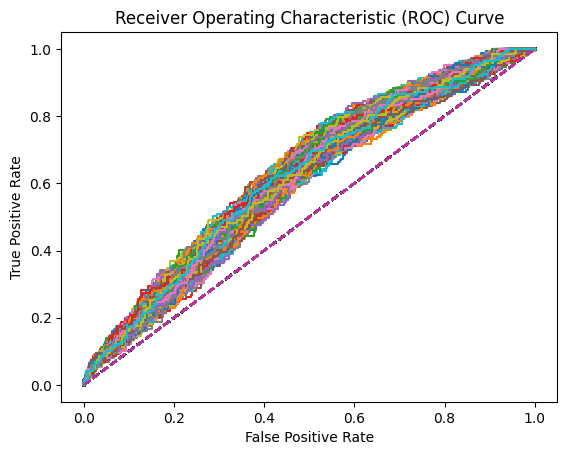

In [ ]:
import matplotlib.colors as mcolors

X_test_dev=np.concatenate((HC_subj_MSE, BD_subj_MSE), axis=0) #avg_dev_subj_bd_test
n_boot=1000
ones=np.ones((n_BD,1)) #BD_test_scaled
zeros=np.zeros((n_HC,1))
y_test=np.concatenate((zeros,ones),axis=0)
y_test=np.repeat(y_test, n_boot, axis=1)
AUC=[]
cmap = mcolors.ListedColormap(np.random.rand(1000,3))

plt.figure()
for i in range(0, n_boot):

  fpr, tpr, thresholds1=metrics.roc_curve(y_test[:,i], X_test_dev[:,i])
  plt.plot(fpr, tpr, label='ROC')
  plt.plot([0, 1], [0, 1], color=cmap(i), linestyle='--')
  #plt.legend()


  auc = metrics.roc_auc_score(y_test[:,i], X_test_dev[:,i])
  AUC.append(auc)
  #print('AUC: %.2f' % auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
alpha=0.05
AUC_mean_CI=calc_CI(pd.DataFrame(AUC),alpha)

 Mean=0    0.612911
dtype: float64, 95% CI=[ 0.5989304812834224, 0.6269825135163007]


Find best MDS threshold optimizing TPR-FPR

In [ ]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [ ]:
# Best threshold
thresholds=[]
for i in range(0, n_boot):
  t=Find_Optimal_Cutoff(y_test[:,i], X_test_dev[:,i])
  thresholds.append(t)

threhsold_mean_CI=calc_CI(pd.DataFrame(thresholds),alpha)



 Mean=0    0.213767
dtype: float64, 95% CI=[ 0.20955504590081533, 0.2181503051069555]


Calculate accuracy with best MDS threshold

In [ ]:
ACC=[]
for i in range(0, n_boot):
  y_prediction=np.zeros((len(X_test_dev)))
  bd_id=np.where(X_test_dev[:,i]>thresholds[i])
  y_prediction[bd_id]=1
  ACC.append(metrics.accuracy_score(y_test[:,i], y_prediction))

In [ ]:
calc_CI(pd.DataFrame( ACC),alpha)

 Mean=0    0.582909
dtype: float64, 95% CI=[ 0.5636363636363636, 0.6036363636363636]


(0    0.582909
 dtype: float64,
 0.5636363636363636,
 0.6036363636363636)

# HC vs. BD discrimination: MEV AUC-ROC 95% CI

In [ ]:
HC_subj_MEV = pd.read_csv(os.path.join(data_path,'HC_subj_mean_EV_boot' + '_.csv' ))
HC_subj_MEV = HC_subj_MEV.drop(HC_subj_MEV.columns[0], axis=1)
HC_subj_MEV = HC_subj_MEV.T

BD_subj_MEV = pd.read_csv(os.path.join(data_path,'BD_subj_mean_EV_boot_withoutMDD' + '_.csv' ))
BD_subj_MEV = BD_subj_MEV.drop(BD_subj_MEV.columns[0], axis=1)
BD_subj_MEV = BD_subj_MEV.T

BD_subj_MEV

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.982477,1.600054,1.589000,1.472992,2.487477,1.164768,1.840825,1.422443,1.175579,2.421186,...,2.554996,2.157985,2.153599,1.716579,1.965618,1.965100,2.383792,2.058030,1.697229,1.687044
1,2.939004,2.918257,1.821017,3.081552,2.228493,2.883899,2.129315,1.570461,2.004485,2.245029,...,1.892883,2.744236,1.651721,2.390820,2.735384,2.332887,3.627940,2.544309,1.763778,2.679420
2,1.452491,1.998674,1.888123,1.745690,1.156232,1.294054,1.568612,1.266980,1.688001,1.388882,...,1.288364,1.545808,1.882683,1.523425,1.612953,1.359231,1.096753,1.543055,1.641901,1.271305
3,36.521398,29.260603,27.351064,27.292882,29.210027,21.752704,27.926869,22.515071,22.989408,26.881790,...,28.859980,18.104278,27.491905,28.130547,31.019016,23.985584,19.262103,28.335009,25.143704,22.818110
4,1.859976,1.999772,1.801268,2.038963,1.837982,1.883110,2.574367,2.792139,1.595499,1.356988,...,2.259589,1.672067,2.058414,1.525870,2.075878,1.842409,2.059239,3.087506,2.934644,2.452794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1.554739,1.788354,2.060224,1.828766,1.659087,2.188317,1.971866,1.921125,2.477334,1.603519,...,1.940730,2.219153,2.873110,1.889818,1.607730,1.799448,1.922490,2.296899,1.787358,1.485122
183,1.163528,1.427290,0.997993,1.021950,1.059988,1.233521,1.206601,1.067213,1.403579,1.342707,...,1.306883,1.421960,1.414917,1.064279,1.420601,1.481854,1.338540,1.096875,1.187201,1.217943
184,2.397527,1.726447,1.772638,2.091673,1.963664,2.206595,2.584020,2.665100,1.981972,2.772421,...,2.605124,1.934474,2.210813,1.508750,2.079424,2.430454,2.332729,2.026036,2.618759,2.112543
185,1.979081,2.463416,2.004638,2.306718,2.139410,1.972576,2.698327,2.407652,2.994467,2.630795,...,2.065620,2.248643,2.086795,1.790676,2.270456,2.355260,1.498719,2.367409,2.284351,2.347170


In [ ]:
HC_subj_MEV

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3.215113,2.181422,2.228304,2.225491,3.468108,2.238301,2.392538,2.038642,2.729751,2.111820,...,2.447366,2.789905,1.758761,2.464554,1.736715,2.160438,2.744019,3.344208,2.306323,3.140707
1,1.849785,1.164458,1.151375,1.192155,1.493146,1.262402,1.059619,2.196613,1.187810,1.110243,...,1.687099,1.160769,1.121747,1.618694,1.692091,1.278581,1.965494,2.114078,1.587461,0.968859
2,1.048592,0.938735,1.137569,1.063451,1.494734,1.160376,1.065326,0.917779,1.123283,0.993950,...,1.265550,0.936149,1.468874,1.230107,1.217558,1.374454,1.231818,0.793286,1.115122,1.174524
3,2.175210,2.881302,1.691766,1.304862,2.984318,1.600885,2.645426,2.888294,2.105854,1.976956,...,2.360098,2.047446,2.449580,2.338619,2.593191,2.175488,2.771848,2.102546,2.312485,2.798202
4,1.919323,1.785902,2.005569,1.556357,1.656522,2.118638,1.701508,1.468389,1.693456,1.579373,...,2.055370,2.147615,1.399060,1.420794,2.036786,2.366277,1.765177,1.695200,1.667504,1.559034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,1.882358,1.437891,1.457007,1.550175,1.391801,1.495124,1.470425,1.551278,1.798150,1.816391,...,1.656532,1.194210,1.218605,2.262126,1.449993,1.313176,2.431701,1.160197,1.822228,1.250307
359,1.370770,1.379215,1.284140,1.474594,1.126317,1.480360,1.419415,1.159491,1.127385,1.387286,...,1.497625,1.272466,1.895929,1.507305,0.917085,1.415246,1.338491,1.414266,1.158485,1.650113
360,1.155268,1.225566,1.641023,1.497984,2.029533,2.230141,2.366221,2.244941,1.264556,1.858044,...,1.379646,1.572020,1.933523,1.858060,2.009422,2.211765,1.518308,2.423932,1.694753,2.075106
361,3.036791,3.235140,4.764499,3.225859,4.380405,3.519675,3.859239,2.594331,3.301852,4.451241,...,3.719223,2.581174,3.357053,3.752543,2.491746,3.776778,3.318064,4.272155,3.052937,3.966035


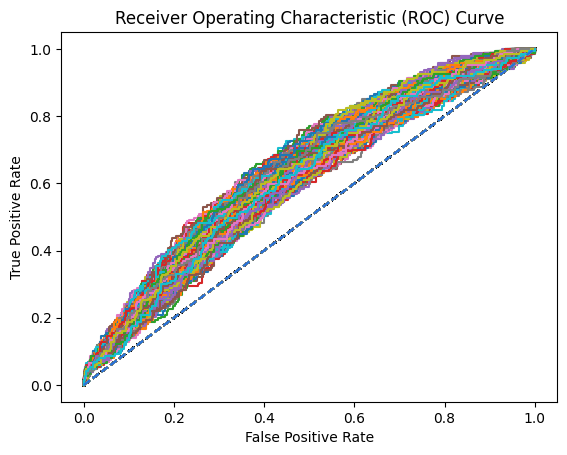

In [ ]:
X_test_dev=np.concatenate((HC_subj_MEV, BD_subj_MEV), axis=0) #avg_dev_subj_bd_test
ones=np.ones((n_BD,1)) #BD_test_scaled
zeros=np.zeros((n_HC,1))
y_test=np.concatenate((zeros,ones),axis=0)
y_test=np.repeat(y_test, n_boot, axis=1)

AUC=[]
cmap = mcolors.ListedColormap(np.random.rand(n_boot,3))

plt.figure()
for i in range(0, n_boot):

  fpr, tpr, thresholds1=metrics.roc_curve(y_test[:,i], X_test_dev[:,i])
  plt.plot(fpr, tpr, label='ROC')
  plt.plot([0, 1], [0, 1], color=cmap(i), linestyle='--')
  #plt.legend()


  auc = metrics.roc_auc_score(y_test[:,i], X_test_dev[:,i])
  AUC.append(auc)
  #print('AUC: %.2f' % auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
alpha=0.05
AUC_mean_CI=calc_CI(pd.DataFrame(AUC),alpha)

 Mean=0    0.621808
dtype: float64, 95% CI=[ 0.5998681516182732, 0.6451606487824281]


In [ ]:
# Best threshold
thresholds=[]
for i in range(0, n_boot):
  t=Find_Optimal_Cutoff(y_test[:,i], X_test_dev[:,i])
  thresholds.append(t)

threhsold_mean_CI=calc_CI(pd.DataFrame( thresholds),alpha)



 Mean=0    1.90316
dtype: float64, 95% CI=[ 1.8417063368287783, 1.972303623410147]


In [ ]:
ACC=[]
for i in range(0, n_boot):
  y_prediction=np.zeros((len(X_test_dev)))
  bd_id=np.where(X_test_dev[:,i]>thresholds[i])
  y_prediction[bd_id]=1
  ACC.append(metrics.accuracy_score(y_test[:,i], y_prediction))

In [ ]:
calc_CI(pd.DataFrame( ACC),alpha)

 Mean=0    0.58992
dtype: float64, 95% CI=[ 0.5618181818181818, 0.6181818181818182]


(0    0.58992
 dtype: float64,
 0.5618181818181818,
 0.6181818181818182)